## Variable selection 7: SHAP values

This notebook goes with the blog post: Variable selection in Python, part II.

### Preliminaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut
import shap
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn import svm
from sklearn.base import clone

In [2]:
font = {'size'   : 22}

plt.rc('font', **font)

### Data loading

In [3]:
data = pd.read_csv('../data/Table2_Hunt_2013_edit.csv').astype('float64')

In [4]:
data = data.loc[:, ['Production', 'Position', 'Gross pay', 'Phi-h', 'Pressure', 'Random 1', 'Random 2', 'Gross pay transform']]
data.head()

,Production,Position,Gross pay,Phi-h,Pressure,Random 1,Random 2,Gross pay transform
0,15.10,2.1,0.1,0.5,19.0,5.0,379.0,3.54
1,21.30,1.1,1.0,4.0,16.0,13.0,269.0,5.79
2,22.75,1.0,1.9,19.0,14.0,12.0,245.0,8.51
3,15.72,2.1,3.1,21.7,17.0,6.0,273.0,11.52
4,7.71,2.9,4.1,24.6,11.0,10.0,237.0,10.16


### SHAP values with Extra Trees (or Random Forest)

Github repo: https://github.com/slundberg/shap

Original paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6467492/pdf/nihms-1505578.pdf

Couple of articles with nice extra features / customizations:

https://blog.dominodatalab.com/shap-lime-python-libraries-part-2-using-shap-lime/

https://meichenlu.com/2018-11-10-SHAP-explainable-machine-learning/

### Scaling features

How to use sklearn fit_transform with pandas and return dataframe instead of numpy array?

https://stackoverflow.com/a/35724176/1034648

In [5]:
X = data.drop('Production',axis=1)
scaled_X = preprocessing.StandardScaler().fit_transform(X)
scaled_X_df = pd.DataFrame(scaled_X, index=X.index, columns=X.columns)

In [6]:
X, y = data.drop('Production',axis=1), data['Production']
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.4, random_state=99)

In [7]:
base_rf = ExtraTreesRegressor(n_estimators=300,
                                n_jobs=-1,
                                bootstrap=True, # https://github.com/slundberg/shap/issues/556#issuecomment-484726256
                             oob_score=True)   

In [8]:
rf = clone(base_rf)
rf.fit(X, y)
#rf.fit(val_X, val_y)

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
          oob_score=True, random_state=None, verbose=0, warm_start=False)

#### Stability of Shapley Values and Multicolinearity

https://github.com/slundberg/shap/issues/288#issuecomment-435537334

In [9]:
explainer = shap.TreeExplainer(rf, feature_dependence = 'tree_path_dependent')
shap_values = explainer.shap_values(X)
#shap_values = explainer.shap_values(val_X)

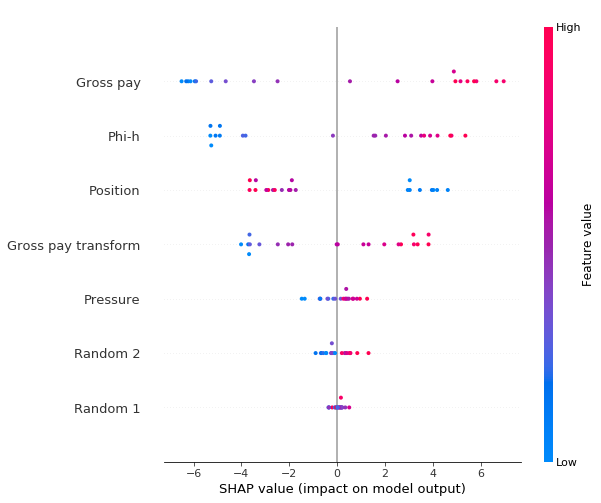

In [10]:
#shap.summary_plot(shap_values, val_X, show=False)
shap.summary_plot(shap_values, X, show=False)
fig = plt.gcf()
fig.set_size_inches(8, 8)
plt.show();

In [11]:
explainer = shap.TreeExplainer(rf, X, feature_dependence = 'independent')
#explainer = shap.TreeExplainer(rf, val_X, feature_dependence = 'independent')
#shap_values = explainer.shap_values(val_X)
shap_values = explainer.shap_values(X)

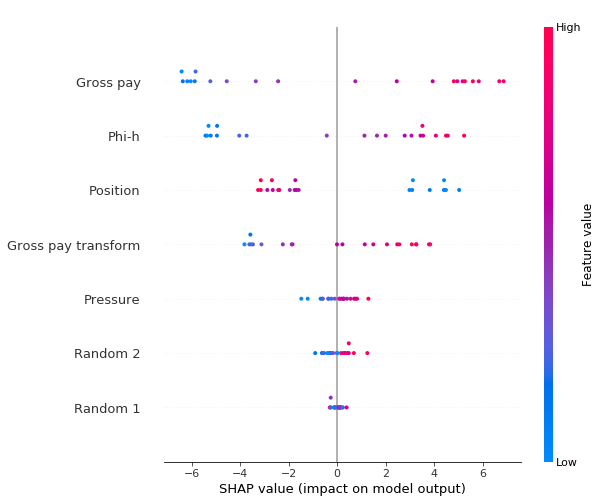

In [12]:
shap.summary_plot(shap_values, X, show=False)
#shap.summary_plot(shap_values, val_X, show=False)
fig = plt.gcf()
fig.set_size_inches(8, 8)
plt.show();

#### SHAP values with linear regression

In [13]:
data = pd.read_csv('../data/Table2_Hunt_2013_edit.csv').astype('float64')

In [14]:
data = data.loc[:, ['Production', 'Position', 'Gross pay', 'Phi-h', 'Pressure', 'Random 1', 'Random 2', 'Gross pay transform']]
data.head()

,Production,Position,Gross pay,Phi-h,Pressure,Random 1,Random 2,Gross pay transform
0,15.10,2.1,0.1,0.5,19.0,5.0,379.0,3.54
1,21.30,1.1,1.0,4.0,16.0,13.0,269.0,5.79
2,22.75,1.0,1.9,19.0,14.0,12.0,245.0,8.51
3,15.72,2.1,3.1,21.7,17.0,6.0,273.0,11.52
4,7.71,2.9,4.1,24.6,11.0,10.0,237.0,10.16


In [6]:
X, y = data.drop('Production',axis=1), data['Production']

In [15]:
LR= LinearRegression()
#LR.fit(val_X, val_y)
LR.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
explainer_L = shap.LinearExplainer(LR, X, feature_dependence="correlation")
#explainer_L = shap.LinearExplainer(LR, val_X, feature_dependence="correlation")
#shap_values = explainer_L.shap_values(val_X)
shap_values = explainer_L.shap_values(X)

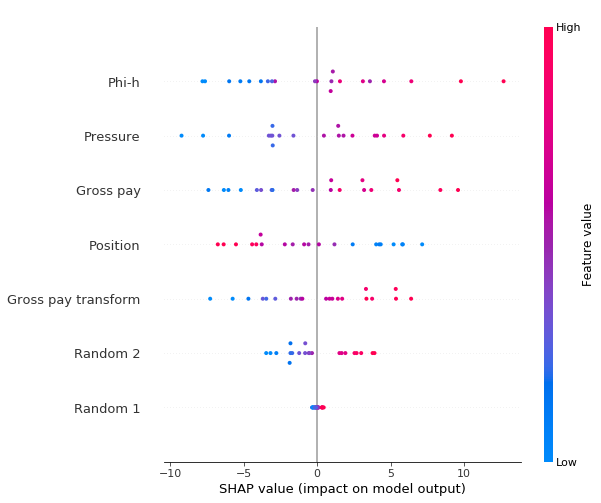

In [17]:
#shap.summary_plot(shap_values, val_X, show=False)
shap.summary_plot(shap_values, X, show=False)
fig = plt.gcf()
fig.set_size_inches(8, 8)
plt.show();

In [18]:
explainer_L = shap.LinearExplainer(LR, X, feature_dependence="independent")
#explainer_L = shap.LinearExplainer(LR, val_X, feature_dependence="correlation")
#shap_values = explainer_L.shap_values(val_X)
shap_values = explainer_L.shap_values(X)

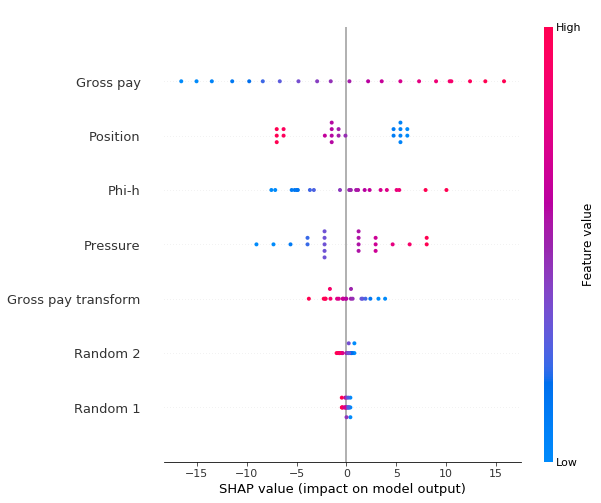

In [19]:
#shap.summary_plot(shap_values, val_X, show=False)
shap.summary_plot(shap_values, X, show=False)
fig = plt.gcf()
fig.set_size_inches(8, 8)
plt.show();

### How to pass best estimator:

https://github.com/slundberg/shap/issues/147

#### Could try SVM too with Kernel explainer

https://github.com/slundberg/shap/blob/master/README.md#model-agnostic-example-with-kernelexplainer-explains-any-function

In [62]:
url = 'https://www.dropbox.com/s/rj62yzw6b16n4sm/Table2_Hunt_2013_edit.csv?dl=0'

In [64]:
data = pd.read_csv(url, columns=['Production', 'Position', 'Gross pay', 'Phi-h', 'Pressure', 'Random 1', 'Random 2', 'Gross pay transform'])

TypeError: parser_f() got an unexpected keyword argument 'columns'

In [ ]:
data = data.loc[:, ['Production', 'Position', 'Gross pay', 'Phi-h', 'Pressure', 'Random 1', 'Random 2', 'Gross pay transform']]

In [43]:
X, y = data.drop('Production',axis=1), data['Production']

In [44]:
SVM_regressor = svm.SVR(cache_size = 800)

In [45]:
loo = LeaveOneOut()

In [46]:
parm_grid={'C': [0.1, 0.5, 1, 3, 5, 7, 9, 11, 13, 15],
            'gamma':[0.0005, 0.0002, 0.0001, 0.001, 0.01, 0.1, 1, 2]}


grid_search = GridSearchCV(SVM_regressor,
                           param_grid=parm_grid,
                           scoring='neg_mean_squared_error',
                           cv=loo)
            
rgr = grid_search.fit(X, y)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

rgr.best_estimator_

Best score: -105.86862440430522
Best parameters: {'C': 9, 'gamma': 0.0001}


SVR(C=9, cache_size=800, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [47]:
SVR_regressor= svm.SVR(C=9, cache_size=800, coef0=0.0, degree=3, 
                          epsilon=0.1, gamma=0.0001, kernel='rbf', 
                          max_iter=-1, shrinking=True, tol=0.001, 
                          verbose=False)

In [51]:
s = SVR_regressor.fit(X,y).predict

In [52]:
explainer = shap.KernelExplainer(s, X)
shap_values = explainer.shap_values(X, l1_reg= 5)

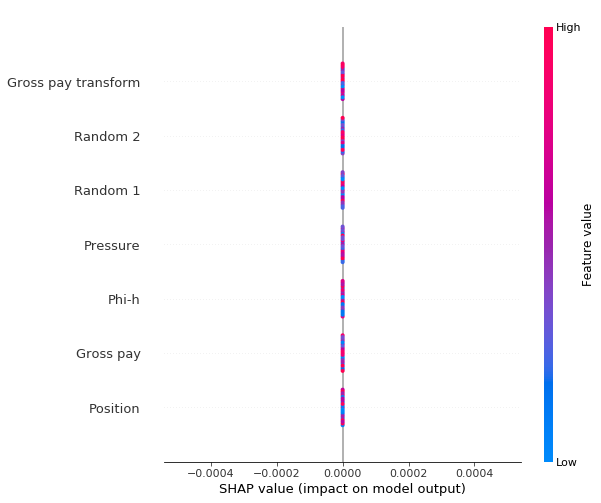

In [53]:
#shap.summary_plot(shap_values, val_X, show=False)
shap.summary_plot(shap_values, X, show=False)
fig = plt.gcf()
fig.set_size_inches(8, 8)
plt.show();